<a href="https://colab.research.google.com/github/jewoolee0502/ComputerVision/blob/main/ECSE415_A3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ECSE 415: Introduction to Computer Vision
Jewoo Lee - 260910789

## Assignment 3: Classifiers and Object Recognition

### Library Requirements

In [137]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

# Imports
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import glob
import os
import math

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


#### Path

In [138]:
path = '/content/drive/MyDrive/McGill/2025/Fall 2025/ECSE 415/A3/'

### 1. Face Detection

#### 1.1 Load all images from Q1 and convert them to grayscale

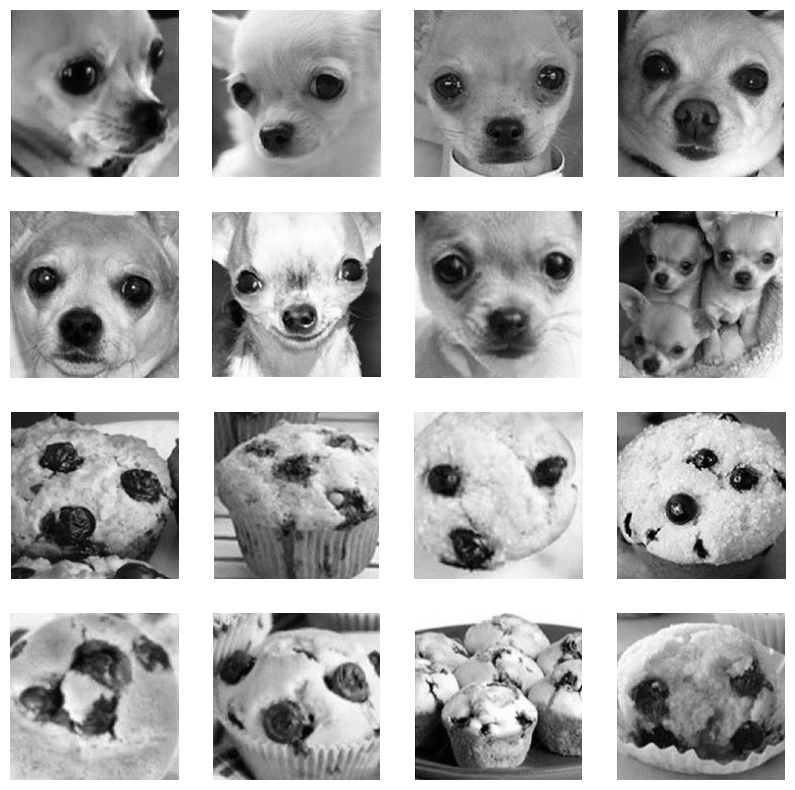

In [139]:
# getting image paths
q1_path = path + 'Q1/'
extensions = ['*.jpg', '*.jpeg']
image_paths = []

for ext in extensions:
  image_paths.extend(glob.glob(os.path.join(q1_path, ext)))

images = []

# loading all images in Q1
for image_path in image_paths:
  image = cv2.imread(image_path)
  gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  images.append(gray_image)

# total 16 images in Q1
# rows = 4
# cols = 4
n = len(images)
rows = math.ceil(math.sqrt(n))
cols = math.ceil(n / rows)

# display grayscale images in a grid
fig, axs = plt.subplots(rows, cols, figsize=(10, 10))
for i in range(rows):
  for j in range(cols):
    axs[i, j].imshow(images[i * cols + j], cmap='gray')
    axs[i, j].axis('off')

    # print each image size
    # print(images[i * cols + j].shape)

plt.show()

#### 1.2 Compute and display the mean face of the Chihuahua images

[[ 96  95  97 ... 128 127 128]
 [ 97 101 104 ... 130 127 124]
 [101 106 106 ... 133 129 126]
 ...
 [150 154 153 ... 170 167 164]
 [151 155 154 ... 168 165 165]
 [152 155 155 ... 165 166 169]]


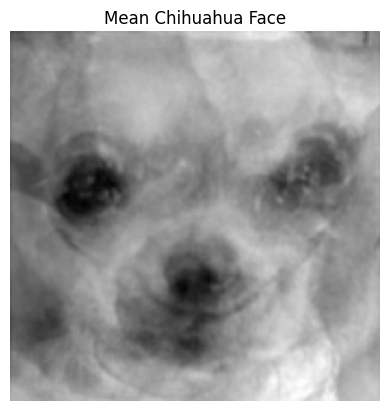

In [140]:
# loading all Chihuahua images
chihuahua_images = []

for image_path in image_paths:
  if 'chihuahua' in image_path:
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    chihuahua_images.append(gray_image)

# resize all chihuahua images
resized_chihuahua_images = []

for img in chihuahua_images:
  if img.shape != chihuahua_images[0].shape:
    img = cv2.resize(img, (chihuahua_images[0].shape[1], chihuahua_images[0].shape[0]))

  resized_chihuahua_images.append(img)

# compute mean face
chihuahua_stack = np.stack(resized_chihuahua_images, axis=0)
mean_face = np.mean(chihuahua_stack, axis=0).astype(np.uint8)
print(mean_face)

# display mean face
plt.imshow(mean_face, cmap='gray')
plt.title('Mean Chihuahua Face')
plt.axis('off')
plt.show()

#### 1.3 Implement PCA

In [141]:
# flatten chihuahua images
flattened_images = np.array([img.flatten() for img in resized_chihuahua_images])
print(f"Flattened images shape: {flattened_images.shape}")

mean_vector = np.mean(flattened_images, axis=0)
print(f"Mean vector shape: {mean_vector.shape}")

centered_images = flattened_images - mean_vector
print(f"Centered images shape: {centered_images.shape}")

# compute covariance matrix
covariance_matrix = np.cov(centered_images, rowvar=True)
print(f"Covariance matrix shape: {covariance_matrix.shape}")

# compute eigenvalues and eigenvectors
eigenvalues, eigenvectors = np.linalg.eig(covariance_matrix)
print(f"Eigen values shape: {eigenvalues.shape}")
print(f"Eigen vectors shape: {eigenvectors.shape}")

# sort
order = np.argsort(eigenvalues)[::-1]
sorted_eigenvalues = eigenvalues[order]
sorted_eigenvectors = eigenvectors[:, order]
print(f"Sorted eigenvalues: {sorted_eigenvalues}")
print(f"Sorted eigenvector: {sorted_eigenvectors}")

# compute eigenface
eigenfaces = centered_images.T @ sorted_eigenvectors
print(f"Eigenfaces shape: {eigenfaces.shape}")

# normalize eigenfaces
for i in range(eigenfaces.shape[1]):
  norm = np.linalg.norm(eigenfaces[:, i])
  if norm > 0:
    eigenfaces[:, i] /= norm

Flattened images shape: (8, 29241)
Mean vector shape: (29241,)
Centered images shape: (8, 29241)
Covariance matrix shape: (8, 8)
Eigen values shape: (8,)
Eigen vectors shape: (8, 8)
Sorted eigenvalues: [5.60808650e+03 3.70837763e+03 3.05526354e+03 2.26649655e+03
 1.63991476e+03 1.38428319e+03 7.63819570e+02 7.07334244e-13]
Sorted eigenvector: [[ 0.12801603 -0.70783959 -0.01517023 -0.22061442 -0.4623609   0.30600433
  -0.03546695 -0.35355339]
 [ 0.1015101  -0.08851473 -0.58700392  0.10425277  0.61489864  0.29788871
  -0.18595853 -0.35355339]
 [ 0.04870234  0.04618057 -0.19604371 -0.1489655   0.03213951 -0.29200537
   0.85063006 -0.35355339]
 [-0.28511788  0.49919256  0.24435721 -0.03099376 -0.13195546  0.67077669
   0.12841303 -0.35355339]
 [-0.02685885  0.32267872 -0.43008096  0.3043993  -0.55019497 -0.31848858
  -0.29728605 -0.35355339]
 [ 0.78013916  0.20089055  0.42354182 -0.01456825  0.11128405 -0.10879725
  -0.14901342 -0.35355339]
 [-0.4028205   0.03425172  0.14664951 -0.63878976

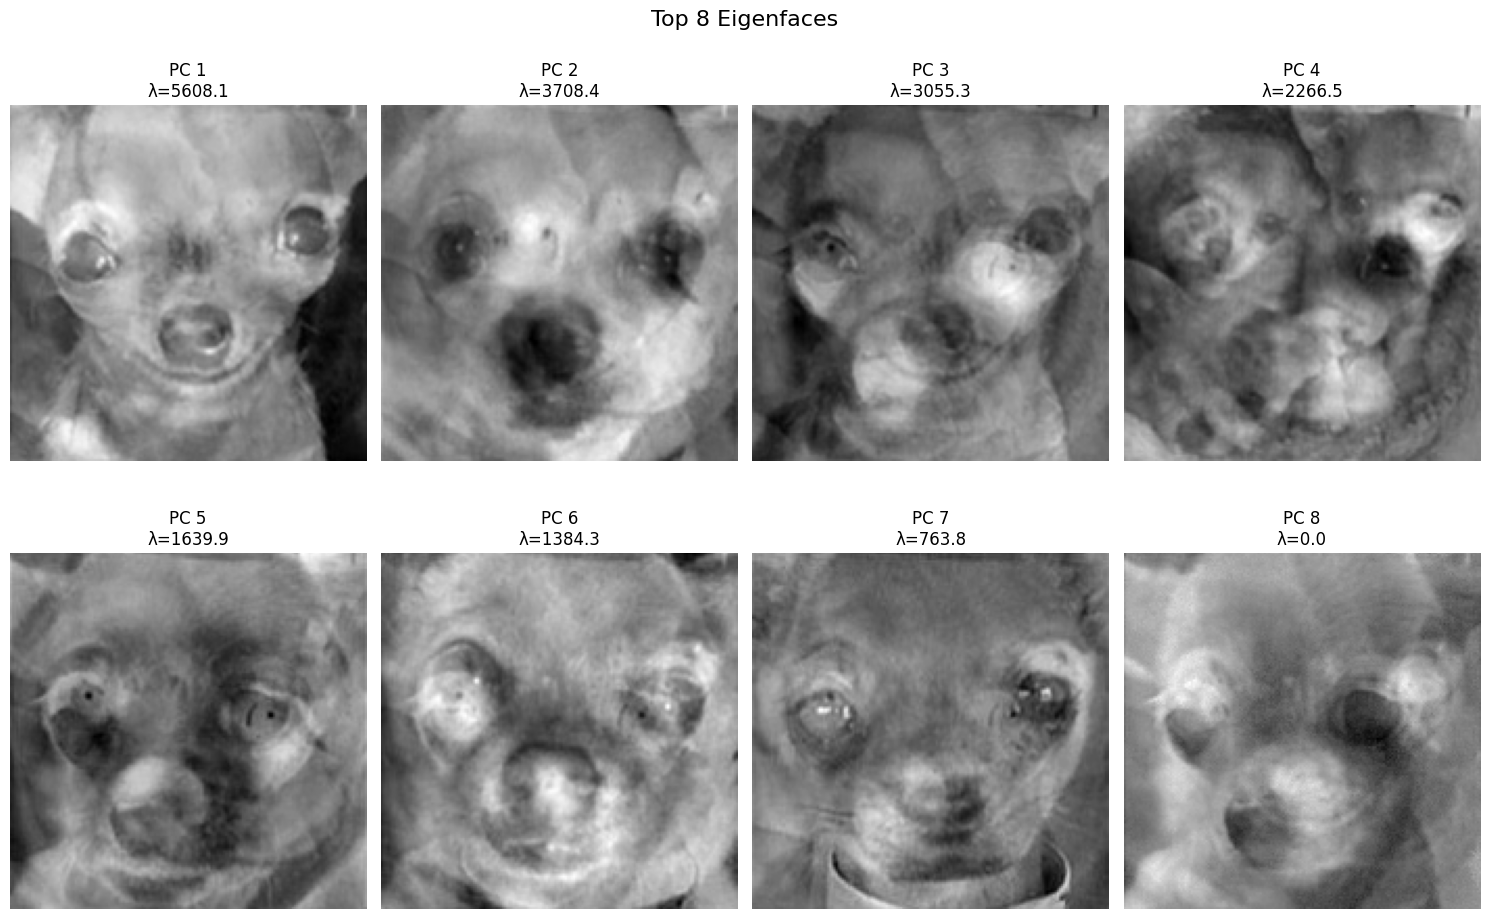

In [142]:
# display top 8 eigenfaces
height, width = resized_chihuahua_images[0].shape
num = eigenfaces.shape[1]

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle('Top 8 Eigenfaces', fontsize=16)

for i in range(num):
  eigenface = eigenfaces[:, i].reshape(height, width)

  # normalize
  eigenface_display = (eigenface - np.min(eigenface)) / (np.max(eigenface) - np.min(eigenface))
  eigenface_display = (eigenface_display * 255).astype(np.uint8)

  axs[i // 4, i % 4].imshow(eigenface, cmap='gray')
  axs[i // 4, i % 4].set_title(f'PC {i+1}\nλ={sorted_eigenvalues[i]:.1f}')
  axs[i // 4, i % 4].axis('off')

plt.tight_layout()
plt.show()

#### 1.4 Determine the number of Principal components required to explain 90% and 95%

In [143]:
total_variance = np.sum(sorted_eigenvalues)
variance_explained = sorted_eigenvalues / total_variance
cumulative_variance = np.cumsum(variance_explained)

# number of 90% and 95% components variance
num_components_90 = np.argmax(cumulative_variance >= 0.9) + 1
num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1

print(f"Number of components required to explain 90% variance: {num_components_90}")
print(f"Number of components required to explain 95% variance: {num_components_95}")

Number of components required to explain 90% variance: 6
Number of components required to explain 95% variance: 6


In [144]:
# reconstruction errors implementation
def reconstruction(centered_img, eigenfaces, mean_vector, num_comp):
  coef = centered_img @ eigenfaces[:, :num_comp]
  reconst_center = mean_vector + coef @ eigenfaces[:, :num_comp].T
  reconst_imgs = reconst_center + mean_vector

  orig_imgs = centered_img + mean_vector
  mse = np.mean((orig_imgs - reconst_imgs)**2)

  return reconst_imgs, mse

# reconstruction for 90%
reconst_imgs_90, mse_90 = reconstruction(centered_images, eigenfaces, mean_vector, num_components_90)
print(f"Reconstruction error for 90% variance: {mse_90:.2f}")

# reconstruction for 95%
reconst_imgs_95, mse_95 = reconstruction(centered_images, eigenfaces, mean_vector, num_components_95)
print(f"Reconstruction error for 95% variance: {mse_95:.2f}")


Reconstruction error for 90% variance: 19166.56
Reconstruction error for 95% variance: 19166.56


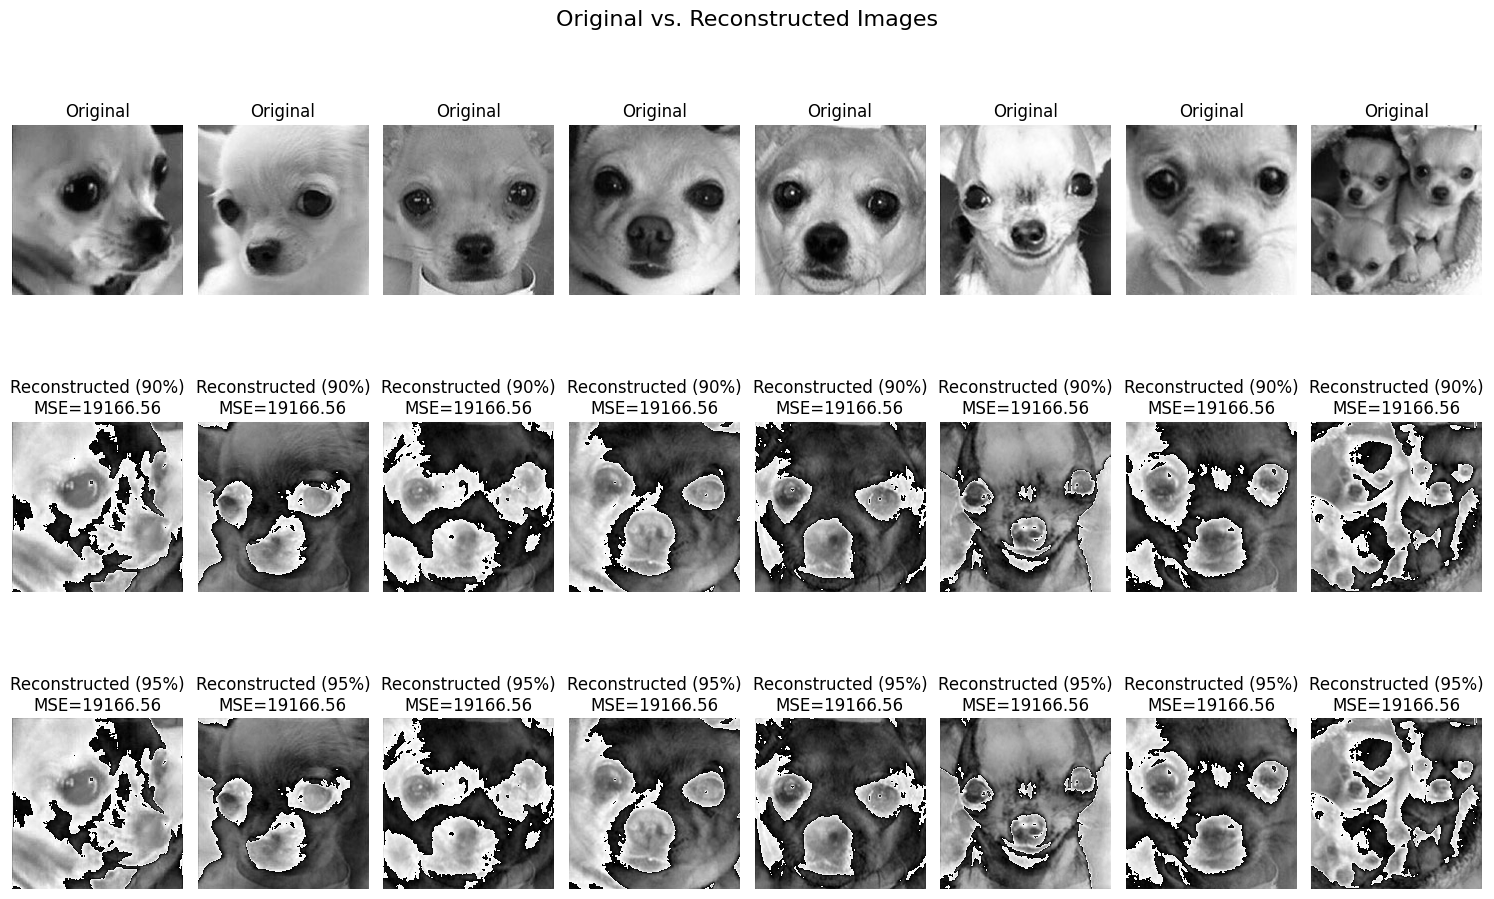

In [145]:
# display
num = len(resized_chihuahua_images)
fig, axs = plt.subplots(3, num, figsize=(15, 10))
fig.suptitle('Original vs. Reconstructed Images', fontsize=16)

for i in range(num):
  original_img = (centered_images[i] + mean_vector).reshape(resized_chihuahua_images[0].shape)
  axs[0, i].imshow(original_img.astype(np.uint8), cmap='gray')
  axs[0, i].set_title('Original')
  axs[0, i].axis('off')

  reconst_img_90 = (reconst_imgs_90[i]).reshape(resized_chihuahua_images[0].shape)
  axs[1, i].imshow(reconst_img_90.astype(np.uint8), cmap='gray')
  axs[1, i].set_title(f'Reconstructed (90%)\nMSE={mse_90:.2f}')
  axs[1, i].axis('off')

  reconst_img_95 = (reconst_imgs_95[i]).reshape(resized_chihuahua_images[0].shape)
  axs[2, i].imshow(reconst_img_95.astype(np.uint8), cmap='gray')
  axs[2, i].set_title(f'Reconstructed (95%)\nMSE={mse_95:.2f}')
  axs[2, i].axis('off')

plt.tight_layout()
plt.show()

##### Discussion:

Discuss the results

#### 1.5 Project muffin images onto eigenface subspace

In [146]:
k = num_components_90

# loading all muffin images
muffin_images = []
muffin_paths = []

for image_path in image_paths:
  if 'muffin' in image_path:
    image = cv2.imread(image_path)
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    muffin_images.append(gray_image)
    muffin_paths.append(image_path)

# resize all muffin images
resized_muffin_images = []

for img in muffin_images:
  if img.shape != muffin_images[0].shape:
    img = cv2.resize(img, (muffin_images[0].shape[1], muffin_images[0].shape[0]))

  resized_muffin_images.append(img)

print('Resized muffin images to: ', resized_muffin_images[0].shape)

# flatten muffin images
flattened_muffin_images = np.array([img.flatten() for img in resized_muffin_images])
print('Flattened muffin images shape: ', flattened_muffin_images.shape)

# center muffin images
centered_muffin_images = flattened_muffin_images - mean_vector # using mean vector from chihuahua
print('Centered muffin images shape: ', centered_muffin_images.shape)

# muffin images onto top k eigenfaces
muffin_coef = centered_muffin_images @ eigenfaces[:, :k]
print('Muffin images onto top k eigenfaces shape: ', muffin_coef.shape)

Resized muffin images to:  (171, 171)
Flattened muffin images shape:  (8, 29241)
Centered muffin images shape:  (8, 29241)
Muffin images onto top k eigenfaces shape:  (8, 6)


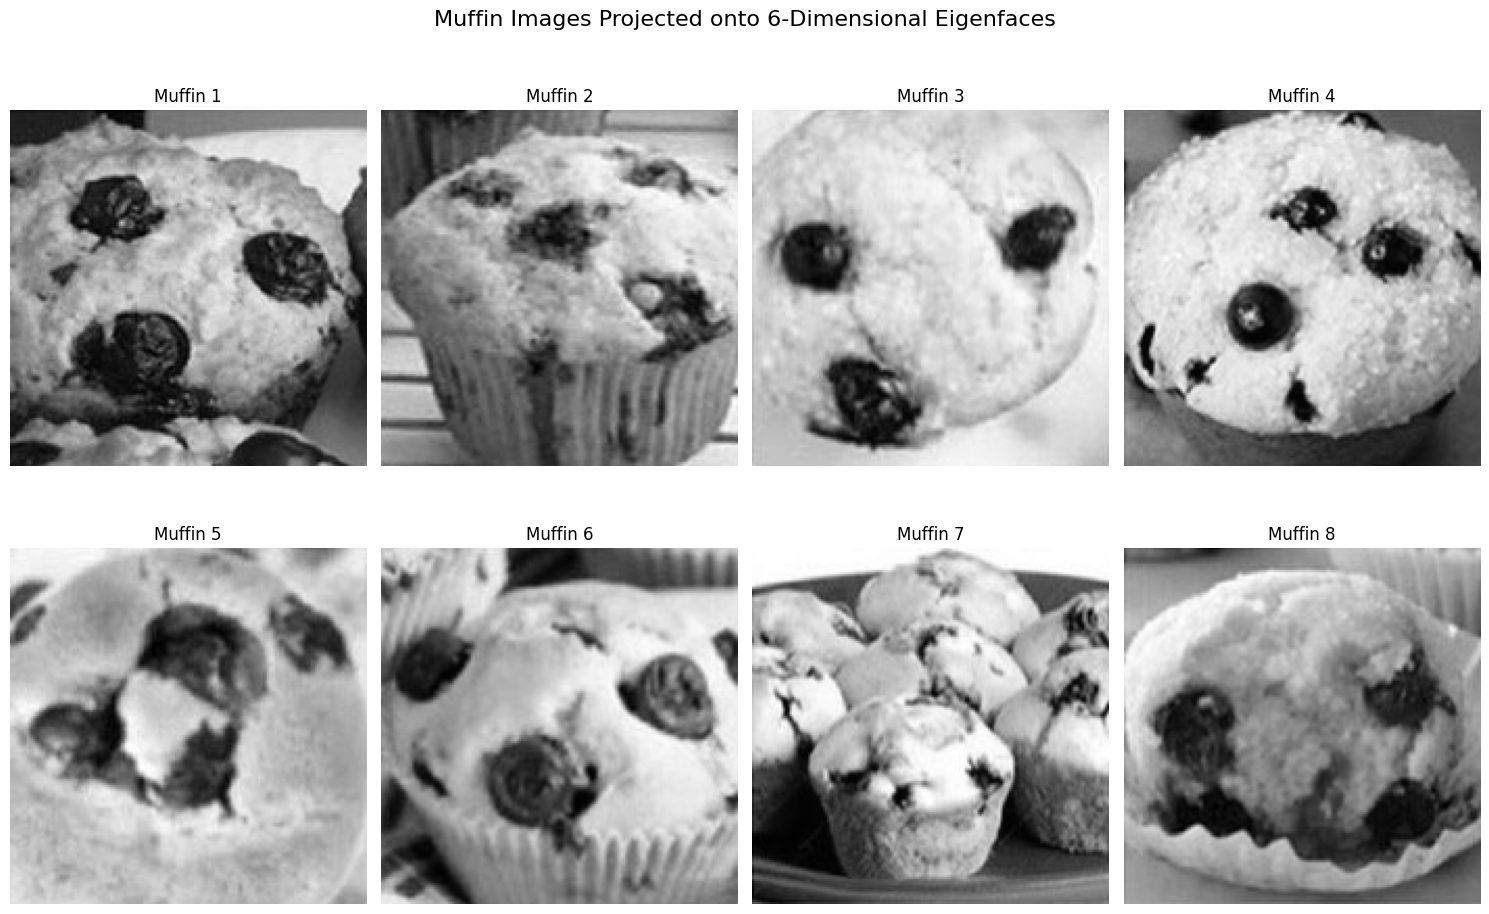

In [147]:
# display
num = len(resized_muffin_images)

fig, axs = plt.subplots(2, 4, figsize=(15, 10))
fig.suptitle(f"Muffin Images Projected onto {k}-Dimensional Eigenfaces", fontsize=16)

for i in range(num):
  axs[i // 4, i % 4].imshow(resized_muffin_images[i], cmap='gray')
  axs[i // 4, i % 4].set_title(f'Muffin {i+1}')
  axs[i // 4, i % 4].axis('off')

plt.tight_layout()
plt.show()

#### 1.6 Compute Euclidean distances (Sort Ascending Order)

In [148]:
# compute Euclidean distance for each muffin
distances = []
for i in range(len(muffin_coef)):
    dist = np.linalg.norm(muffin_coef[i])
    distances.append(dist)

# results DataFrame
results_df = pd.DataFrame({
    'Image': [os.path.basename(path) for path in muffin_paths],
    'Path': muffin_paths,
    'Distance': distances
})

# sort by distance in ascending order
sorted_results_df = results_df.sort_values('Distance', ascending=True).reset_index(drop=True)

print("Distances Sorted in Ascending Order: \n")
print(sorted_results_df[['Image', 'Distance']])

# statistics summary
print(f"\nStatistics:\n")
print(f"Minimum distance: {sorted_results_df['Distance'].min():.2f}")
print(f"Maximum distance: {sorted_results_df['Distance'].max():.2f}")
print(f"Mean distance: {sorted_results_df['Distance'].mean():.2f}")
print(f"Median distance: {sorted_results_df['Distance'].median():.2f}")
print(f"Standard deviation: {sorted_results_df['Distance'].std():.2f}")

Distances Sorted in Ascending Order: 

           Image     Distance
0  muffin-2.jpeg  2385.544020
1  muffin-1.jpeg  3095.214002
2  muffin-5.jpeg  3380.240224
3  muffin-6.jpeg  4062.474191
4  muffin-4.jpeg  4095.571591
5  muffin-8.jpeg  4368.751482
6  muffin-7.jpeg  4985.681266
7  muffin-3.jpeg  6363.948385

Statistics:

Minimum distance: 2385.54
Maximum distance: 6363.95
Mean distance: 4092.18
Median distance: 4079.02
Standard deviation: 1221.83


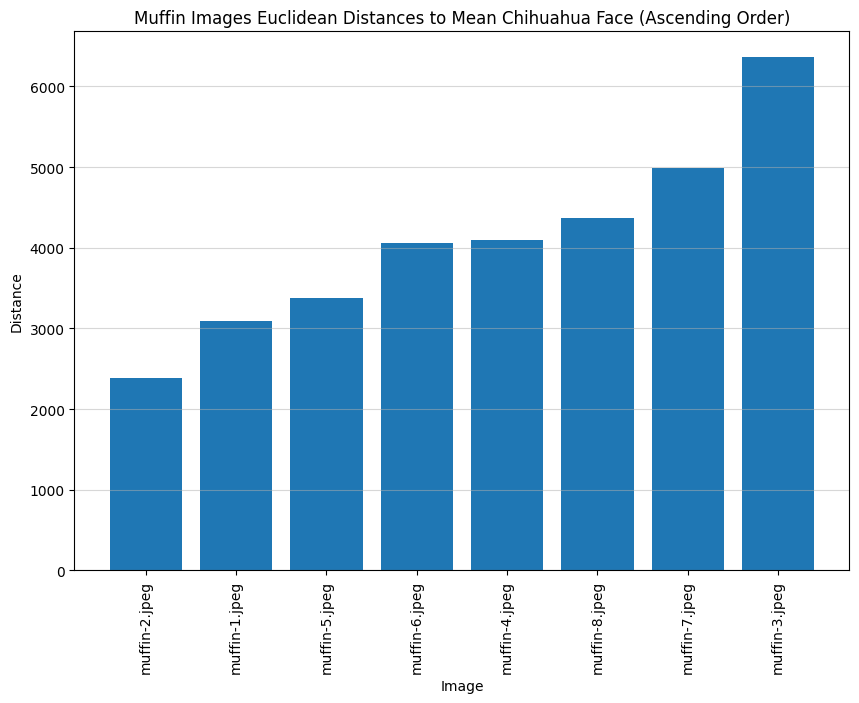

In [149]:
# bar plot
plt.figure(figsize=(10, 7))
plt.bar(sorted_results_df['Image'], sorted_results_df['Distance'])
plt.xlabel('Image')
plt.ylabel('Distance')
plt.title('Muffin Images Euclidean Distances to Mean Chihuahua Face (Ascending Order)')
plt.xticks(rotation=90)
plt.grid(axis='y', alpha=0.5)
plt.show()

### 2. Classifiers

#### 2.1 Dataset Preparation

#### 2.2 Feature Extraction

#### 2.3 SVM Classifiers

#### 2.4 Random Forest Classifiers

#### 2.5 Testing and Visualization

#### 2.6 Analysis and Discussion